# Supervised Machine Learning: Regression

### Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### Importing Data

In [3]:
# Define path
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Achievement 6'

In [4]:
# Importing data set
df = pd.read_csv(os.path.join(path, 'Data', 'cardatanew.csv'), index_col=False)

### Checking data and prepping for regression analysis

In [5]:
df.head()

Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  2016-02-08 11:00:00  39.865147 -84.058723          0.01   
1  2016-02-08 06:37:59  39.928059 -82.831184          0.01   
2  2016-02-08 07:19:27  39.063148 -84.032608          0.01   
3  2016-02-08 07:53:34  39.747753 -84.205582          0.01   
4  2016-02-08 08:09:07  39.627781 -84.188354          0.01   

                                         Description  ... Turning_Loop  Year  \
0  Right lane blocked due to accident on I-70 Eas...  ...        False  2016   
1  Accident on Brice Rd at Tussing Rd. Expect del...  ...        False  2016   
2  Accident on OH-32 State Route 32 Westbound at ...  ...        False  2016   
3  Accident on I-75 Southbound at Exits 52 52B US...  ...        False  2016   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...  ...        False  2016   

  Month Day Severity Scale     Weather_Category  Temperature_Category  Hour  \
0     2   8       Moderate        Rainy/Drizzly              Moderate     5   
1     2   8       Moderate        Rainy/Drizzly              Moderate     6   
2     2   8       Moderate      Cloudy/Overcast              Moderate     6   
3     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   
4     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   

   Time_of_Day  State_Full  
0        Night        Ohio  
1      Morning        Ohio  
2      Morning        Ohio  
3      Morning        Ohio  
4      Morning        Ohio  

[5 rows x 46 columns]

In [6]:
df.shape

(6976702, 46)

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Year', 'Month', 'Day', 'Severity Scale',
       'Weather_Category', 'Temperature_Category', 'Hour', 'Time_of_Day',
       'State_Full'],
      dtype='object')

In [8]:
# Dropping unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Year',
       'Month', 'Day', 'Severity Scale', 'Weather_Category',
       'Temperature_Category', 'Hour', 'Time_of_Day', 'State_Full'],
      dtype='object')

### Categorizing the Street column (not applicable to regression)

In [6]:
# Checking street column for categorization
df['Street'].head(50)

0                        I-70 E
1                      Brice Rd
2                State Route 32
3                        I-75 S
4     Miamisburg Centerville Rd
5                Westerville Rd
6                N Woodward Ave
7                     N Main St
8                Notre Dame Ave
9                Westerville Rd
10                  Outerbelt S
11                       I-70 E
12               Watervliet Ave
13                    Salem Ave
14                   E Broad St
15                  Glencoe Ave
16         S James H McGee Blvd
17                  Delphos Ave
18                   Rubicon St
19              W Hillcrest Ave
20                 Brookhill Dr
21                 Princeton Dr
22              Springboro Pike
23                  North Fwy S
24                   Hoover Ave
25            Sportsman Club Rd
26                   Irving Ave
27                  W Helena St
28               Litchfield Ave
29                     E 4th St
30                    Frantz Rd
31      

In [7]:
# Categorizing the Street column into road type
def categorize_street(street):
    street = str(street).lower()  
    
    # Check for major interstates and freeways
    if "i-" in street or "interstate" in street or "fwy" in street or "freeway" in street or "expy" in street:
        return 'Interstate/Freeway'
    
    # List of U.S. state abbreviations
    state_abbreviations = [
        "al", "ak", "az", "ar", "ca", "co", "ct", "de", "fl", "ga", "hi", "id", "il", "in", "ia", "ks", "ky", "la", "me", "md", "ma", "mi", 
        "mn", "ms", "mo", "mt", "ne", "nv", "nh", "nj", "nm", "ny", "nc", "nd", "oh", "ok", "or", "pa", "ri", "sc", "sd", "tn", "tx", "ut", 
        "vt", "va", "wa", "wv", "wi", "wy"
    ]
    
    # Check for highways 
    if ("hwy" in street or "highway" in street or "us" in street or "us route" in street or "sr" in street or "pkwy" in street or "w" in street or "e" in street or "s" in street or "n" in street):
        return 'Highway'
    
    # Check if street contains any state abbreviation for state highways
    for state in state_abbreviations:
        if state in street:
            return 'Highway'
    
    # Check for urban roads and streets 
    if ("avenue" in street or "ave" in street or "street" in street or "st" in street or "boulevard" in street or "blvd" in street or 
          "main" in street or "rd" in street or "dr" in street or "ln" in street or "ct" in street or "way" in street or "xing" in street or 
          "ter" in street or "circle" in street or "cir" in street or "pl" in street or "is" in street):
        return 'Urban Road'
    
    # Check for rural roads 
    if "county road" in street or "farm" in street or "rural" in street or "route" in street or "pike" in street or "trl" in street or "trail" in street or "road" in street or "m" in street:
        return 'Rural Road'
    
    # Check for beltways, beltlines, or loops 
    if "outerbelt" in street or "innerbelt" in street or "beltway" in street or "loop" in street or "beltline" in street:
        return 'Beltway/Loop'
    
    # Check for specific road types like bridge
    if "bridge" in street or "brg" in street:
        return 'Bridge'
    
    # If no specific match, return 'Unknown'
    else:
        return 'Unknown'

In [8]:
df['Road_Type'] = df['Street'].apply(categorize_street)

In [9]:
df[['Street', 'Road_Type']].head(50)

Street           Road_Type
0                      I-70 E  Interstate/Freeway
1                    Brice Rd             Highway
2              State Route 32             Highway
3                      I-75 S  Interstate/Freeway
4   Miamisburg Centerville Rd             Highway
5              Westerville Rd             Highway
6              N Woodward Ave             Highway
7                   N Main St             Highway
8              Notre Dame Ave             Highway
9              Westerville Rd             Highway
10                Outerbelt S             Highway
11                     I-70 E  Interstate/Freeway
12             Watervliet Ave             Highway
13                  Salem Ave             Highway
14                 E Broad St             Highway
15                Glencoe Ave             Highway
16       S James H McGee Blvd             Highway
17                Delphos Ave             Highway
18                 Rubicon St             Highway
19            W Hillcrest Ave             Highway
20               Brookhill Dr             Highway
21               Princeton Dr             Highway
22            Springboro Pike             Highway
23                North Fwy S  Interstate/Freeway
24                 Hoover Ave             Highway
25          Sportsman Club Rd             Highway
26                 Irving Ave             Highway
27                W Helena St             Highway
28             Litchfield Ave             Highway
29                   E 4th St             Highway
30                  Frantz Rd             Highway
31           Bellefontaine Rd             Highway
32                North Fwy S  Interstate/Freeway
33                Outerbelt N             Highway
34            Olentangy Fwy N  Interstate/Freeway
35            Olentangy Fwy S  Interstate/Freeway
36                  S Main St             Highway
37                   Diley Rd             Highway
38                   Kiser St             Highway
39                 Stelzer Rd             Highway
40                  Monroe Rd             Highway
41               Air City Ave             Highway
42           S State Route 72             Highway
43                 E Broad St             Highway
44               Benchwood Rd             Highway
45                 East Fwy W  Interstate/Freeway
46                   Kenny Rd             Highway
47              S Hamilton Rd             Highway
48                  Brandt St             Highway
49                     I-75 S  Interstate/Freeway

In [10]:
df['Road_Type'].value_counts()

Road_Type
Highway               4747979
Interstate/Freeway    2183767
Urban Road              25812
Unknown                  9749
Rural Road               9055
Bridge                    192
Beltway/Loop              148
Name: count, dtype: int64

In [11]:
# Show unknown values in the road type column
unknown_values = df[df['Road_Type'] == 'Unknown']

In [16]:
unknown_values.head(50)

ID   Source  Severity           Start_Time             End_Time  \
109542  A-109550  Source2         2  2016-05-26 13:32:50  2016-05-26 14:17:50   
127921  A-127934  Source2         2  2016-11-16 08:15:59  2016-11-16 09:00:48   
183232  A-183245  Source2         2  2017-01-23 08:08:07  2017-01-23 08:37:56   
223182  A-223195  Source2         2  2017-01-11 16:11:22  2017-01-11 16:40:53   
231722  A-231735  Source2         2  2016-12-19 09:53:51  2016-12-19 10:23:26   
291772  A-291786  Source2         2  2016-10-18 17:06:28  2016-10-18 17:36:15   
360441  A-360458  Source2         3  2017-03-31 07:28:47  2017-03-31 07:58:11   
460325  A-460345  Source2         2  2017-06-12 08:42:23  2017-06-12 09:12:08   
512216  A-512237  Source2         2  2022-09-08 06:52:22  2022-09-08 07:32:43   
512398  A-512439  Source2         3  2022-09-08 09:20:00  2022-09-08 10:51:49   
512684  A-512752  Source2         1  2022-09-08 07:42:42  2022-09-08 08:33:44   
512719  A-512793  Source2         1  2022-09-08 07:24:59  2022-09-08 07:54:37   
512833  A-512925  Source2         3  2022-09-08 07:30:40  2022-09-08 08:00:02   
512887  A-512992  Source2         2  2022-09-08 05:51:23  2022-09-08 06:20:56   
513000  A-513120  Source2         3  2022-09-08 06:49:52  2022-09-08 07:18:54   
513059  A-513187  Source2         3  2022-09-07 21:30:04  2022-09-07 21:59:29   
513100  A-513229  Source2         2  2022-09-07 18:44:00  2022-09-07 19:28:36   
513330  A-513475  Source2         2  2022-09-07 19:01:58  2022-09-07 19:30:00   
513367  A-513515  Source2         3  2022-09-07 17:00:17  2022-09-07 17:44:56   
513408  A-513565  Source2         2  2022-09-07 17:13:56  2022-09-07 17:58:26   
513479  A-513651  Source2         2  2022-09-07 15:55:33  2022-09-07 16:42:00   
513491  A-513667  Source2         2  2022-09-07 15:52:46  2022-09-07 16:51:41   
513535  A-513719  Source2         3  2022-09-07 13:30:26  2022-09-07 14:14:10   
513578  A-513763  Source2         3  2022-09-07 11:53:17  2022-09-07 12:38:19   
513624  A-513815  Source2         2  2022-09-07 08:47:02  2022-09-07 09:16:37   
514013  A-514244  Source2         1  2022-09-07 07:28:52  2022-09-07 08:14:58   
514039  A-514272  Source2         1  2022-09-07 07:44:33  2022-09-07 08:29:26   
514042  A-514276  Source2         2  2022-09-07 08:51:10  2022-09-07 09:20:46   
514077  A-514326  Source2         2  2022-09-07 06:57:27  2022-09-07 07:26:45   
514109  A-514358  Source2         3  2022-09-07 06:35:26  2022-09-07 07:34:21   
514423  A-514721  Source2         2  2022-09-06 16:14:11  2022-09-06 16:59:03   
514478  A-514778  Source2         3  2022-09-06 17:46:41  2022-09-06 18:27:00   
514679  A-514991  Source2         2  2022-09-06 16:14:45  2022-09-06 16:42:21   
514716  A-515033  Source2         2  2022-09-06 16:08:20  2022-09-06 16:37:54   
514772  A-515094  Source2         2  2022-09-06 14:42:43  2022-09-06 15:27:21   
514848  A-515177  Source2         3  2022-09-06 13:02:36  2022-09-06 13:30:48   
514931  A-515269  Source2         2  2022-09-06 09:16:11  2022-09-06 09:45:33   
514934  A-515272  Source2         3  2022-09-06 07:14:28  2022-09-06 07:59:04   
515197  A-515572  Source2         2  2022-09-06 07:48:17  2022-09-06 08:32:30   
515232  A-515609  Source2         3  2022-09-06 08:13:45  2022-09-06 08:42:52   
515451  A-515871  Source2         3  2022-09-06 07:15:36  2022-09-06 08:00:33   
515533  A-515961  Source2         2  2022-09-06 06:54:20  2022-09-06 07:23:52   
515557  A-515995  Source2         3  2022-09-06 05:30:45  2022-09-06 06:30:24   
515769  A-516222  Source2         3  2022-09-05 17:42:22  2022-09-05 18:11:55   
515819  A-516276  Source2         3  2022-09-05 17:12:01  2022-09-05 17:54:02   
515824  A-516281  Source2         2  2022-09-05 04:18:35  2022-09-05 05:03:14   
515834  A-516292  Source2         3  2022-09-05 16:51:50  2022-09-05 17:51:57   
515965  A-516424  Source2         3  2022-09-05 11:34:22  2022-09-05 12:18:44   
516011  A-516476  Source2         2  2022-09-

In [12]:
# Filter rows where the 'Road_Type' column is 'unknown'
unknown_road_type = df[df['Road_Type'] == 'Unknown']

In [13]:
# Display the result
print(unknown_road_type[['Street', 'Road_Type']]) 

           Street Road_Type
109542      Fitch   Unknown
127921     C 476B   Unknown
183232       Taft   Unknown
223182     Old 35   Unknown
231722       T489   Unknown
...           ...       ...
6848486       26A   Unknown
6859682       26A   Unknown
6910367    RT-201   Unknown
6928390       26A   Unknown
6935117   441 Byp   Unknown

[9749 rows x 2 columns]


In [14]:
df[['Street', 'Road_Type']]

Street           Road_Type
0                           I-70 E  Interstate/Freeway
1                         Brice Rd             Highway
2                   State Route 32             Highway
3                           I-75 S  Interstate/Freeway
4        Miamisburg Centerville Rd             Highway
...                            ...                 ...
6976697               Pomona Fwy E  Interstate/Freeway
6976698                      I-8 W  Interstate/Freeway
6976699           Garden Grove Fwy  Interstate/Freeway
6976700            San Diego Fwy S  Interstate/Freeway
6976701                   CA-210 W             Highway

[6976702 rows x 2 columns]

### Cleaning

Text(0.5, 1.0, 'Original Data (with outliers)')

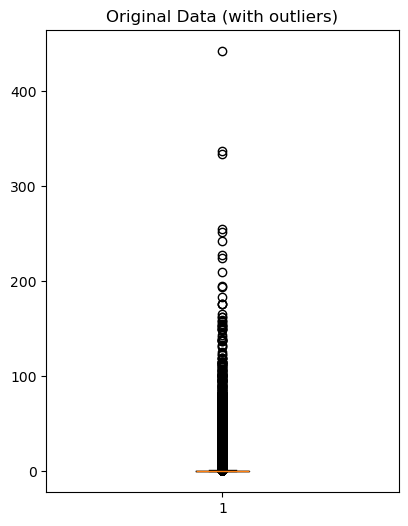

In [20]:
# Distance column values
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Distance(mi)'])
plt.title('Original Data (with outliers)')

In [21]:
# Handle outliers in the distance column
# Remove rows where Distance(mi) is greater than 200
df2 = df[df['Distance(mi)'] <= 200]

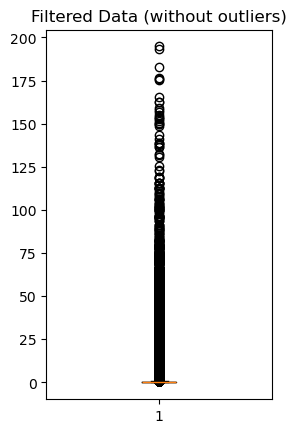

In [22]:
# Distance column value after handling outliers
plt.subplot(1, 2, 2)
plt.boxplot(df2['Distance(mi)'])
plt.title('Filtered Data (without outliers)')
plt.show()

### Exploring variables for testing

In [23]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Year',
       'Month', 'Day', 'Severity Scale', 'Weather_Category',
       'Temperature_Category', 'Hour', 'Time_of_Day', 'State_Full',
       'Road_Type'],
      dtype='object')

In [24]:
# Severity by road type
severity_by_road_type = df.groupby('Road_Type')['Severity'].mean().reset_index()

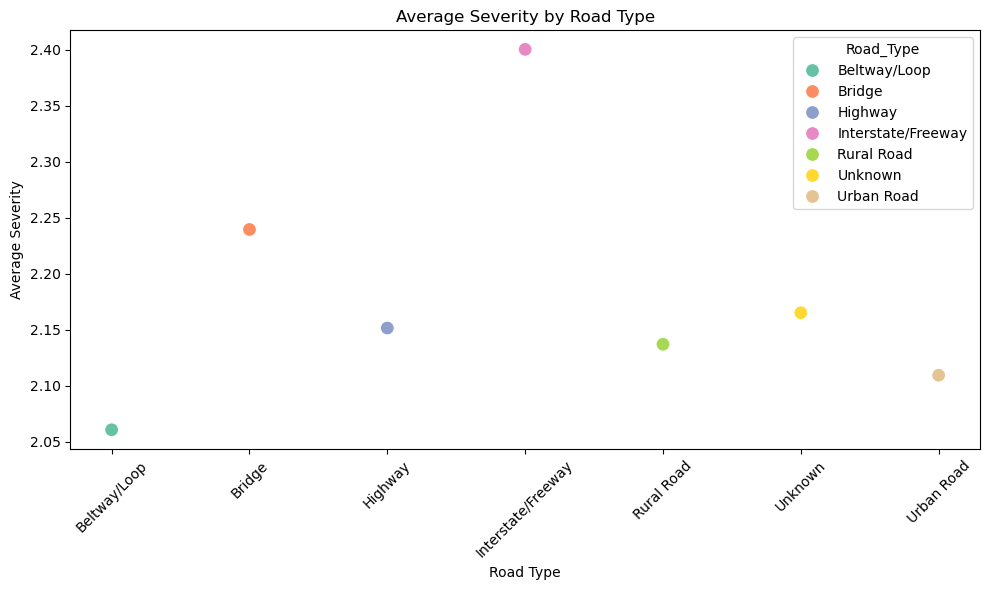

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=severity_by_road_type, x='Road_Type', y='Severity', hue='Road_Type', palette='Set2', s=100)
plt.title('Average Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

By looking at this scatter plot, the average severity of accidents are significantly higher on interstates/freeways.

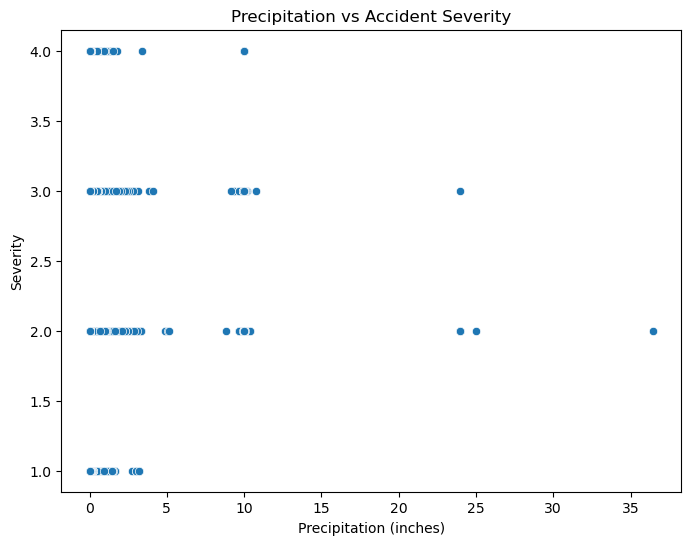

In [26]:
# Precipitation vs severity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Precipitation(in)', y='Severity')
plt.title('Precipitation vs Accident Severity')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Severity')
plt.show()

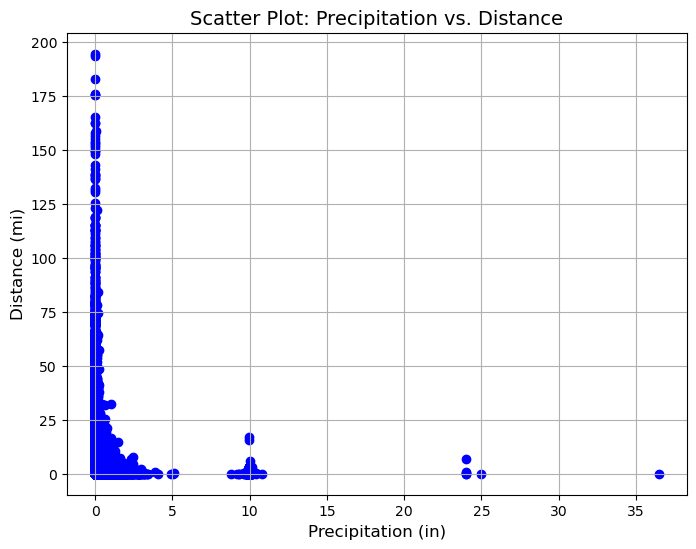

In [27]:
# Precipitation and Distance
plt.figure(figsize=(8, 6))
plt.scatter(df2['Precipitation(in)'], df2['Distance(mi)'], color='blue')
plt.title('Scatter Plot: Precipitation vs. Distance', fontsize=14)
plt.xlabel('Precipitation (in)', fontsize=12)
plt.ylabel('Distance (mi)', fontsize=12)
plt.grid(True)
plt.show()

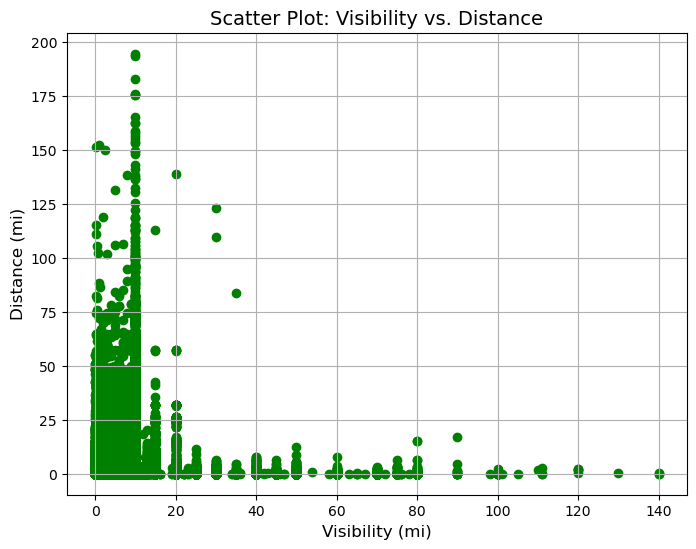

In [28]:
# Visibility and Distance
plt.figure(figsize=(8, 6))
plt.scatter(df2['Visibility(mi)'], df2['Distance(mi)'], color='green')
plt.title('Scatter Plot: Visibility vs. Distance', fontsize=14)
plt.xlabel('Visibility (mi)', fontsize=12)
plt.ylabel('Distance (mi)', fontsize=12)
plt.grid(True)
plt.show()

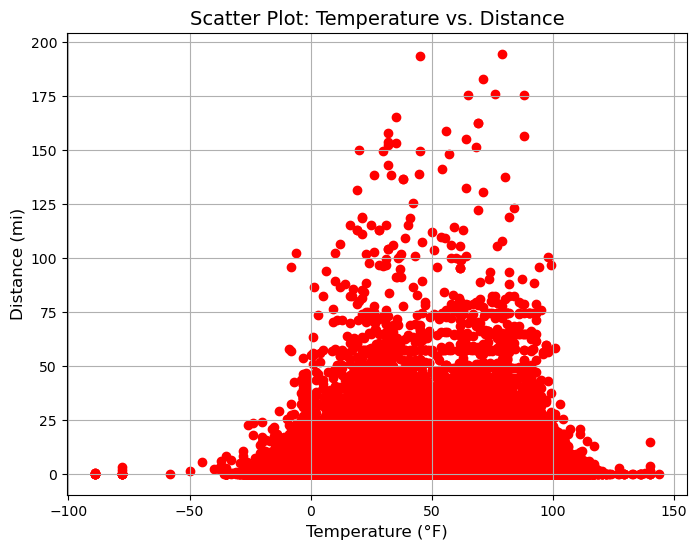

In [29]:
# Distance and Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df2['Temperature(F)'], df2['Distance(mi)'], color='red')
plt.title('Scatter Plot: Temperature vs. Distance', fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Distance (mi)', fontsize=12)
plt.grid(True)
plt.show()

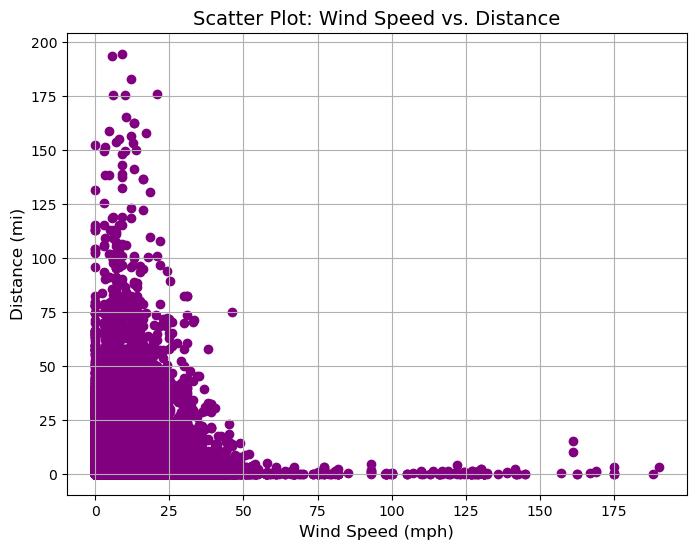

In [30]:
# Distance and Wind Speed
plt.figure(figsize=(8, 6))
plt.scatter(df2['Wind_Speed(mph)'], df2['Distance(mi)'], color='purple')
plt.title('Scatter Plot: Wind Speed vs. Distance', fontsize=14)
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Distance (mi)', fontsize=12)
plt.grid(True)
plt.show()

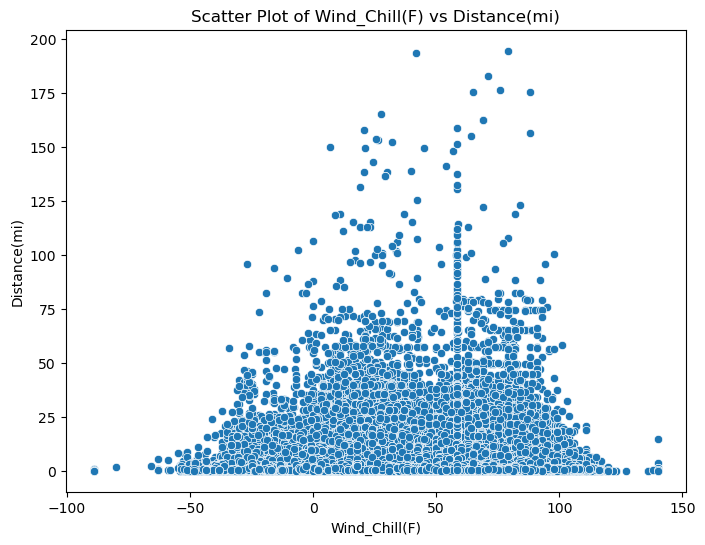

In [55]:
# Scatter plot for Wind_Chill(F) vs Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind_Chill(F)', y='Distance(mi)', data=df2)
plt.title('Scatter Plot of Wind_Chill(F) vs Distance(mi)')
plt.xlabel('Wind_Chill(F)')
plt.ylabel('Distance(mi)')
plt.show()

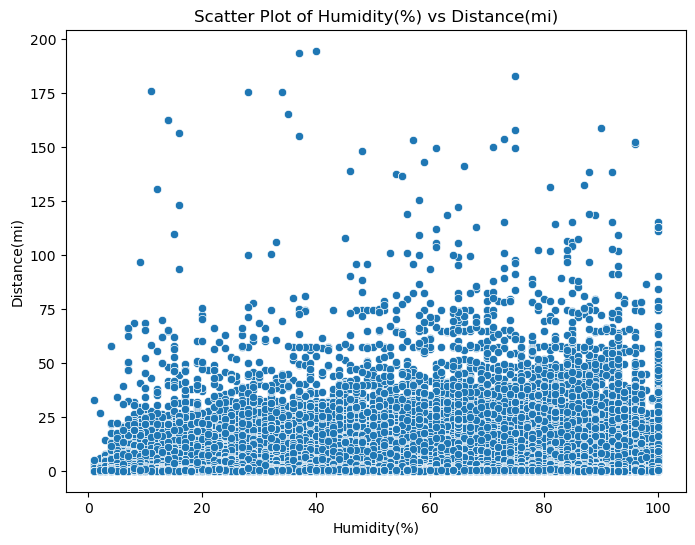

In [56]:
# Create scatter plot for Humidity(%) vs Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity(%)', y='Distance(mi)', data=df2)
plt.title('Scatter Plot of Humidity(%) vs Distance(mi)')
plt.xlabel('Humidity(%)')
plt.ylabel('Distance(mi)')
plt.show()

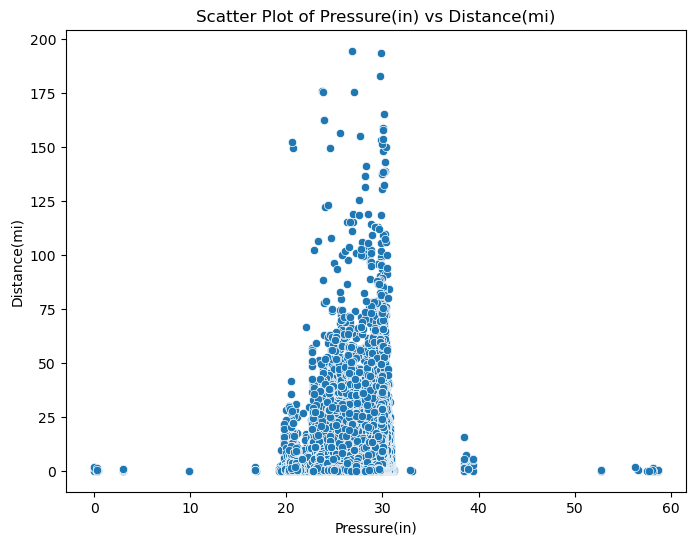

In [57]:
# Create scatter plot for Pressure(in) vs Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pressure(in)', y='Distance(mi)', data=df2)
plt.title('Scatter Plot of Pressure(in) vs Distance(mi)')
plt.xlabel('Pressure(in)')
plt.ylabel('Distance(mi)')
plt.show()

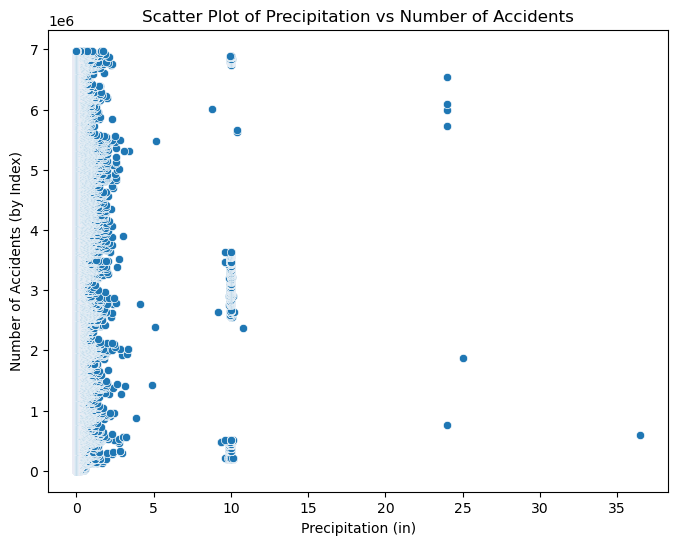

In [70]:
# Create a scatter plot for Precipitation vs Number of Accidents
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Precipitation(in)', y=df.index, data=df)
plt.title('Scatter Plot of Precipitation vs Number of Accidents')
plt.xlabel('Precipitation (in)')
plt.ylabel('Number of Accidents (by Index)')
plt.show()

In [71]:
# List of continuous variables to plot against the number of accidents
continuous_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                      'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

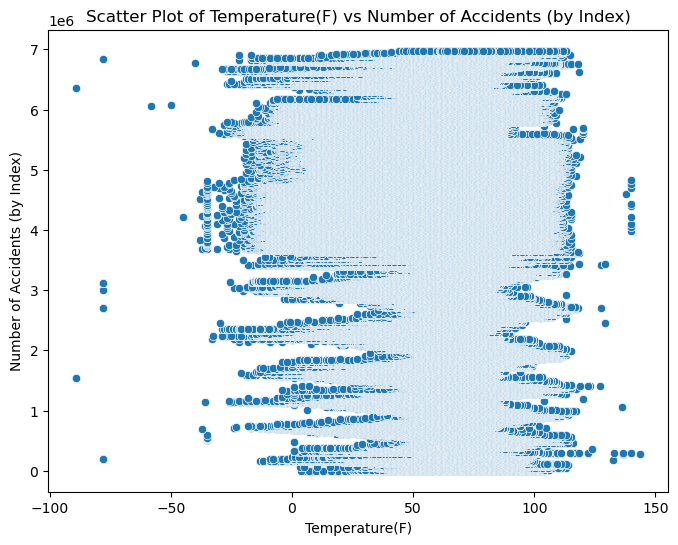

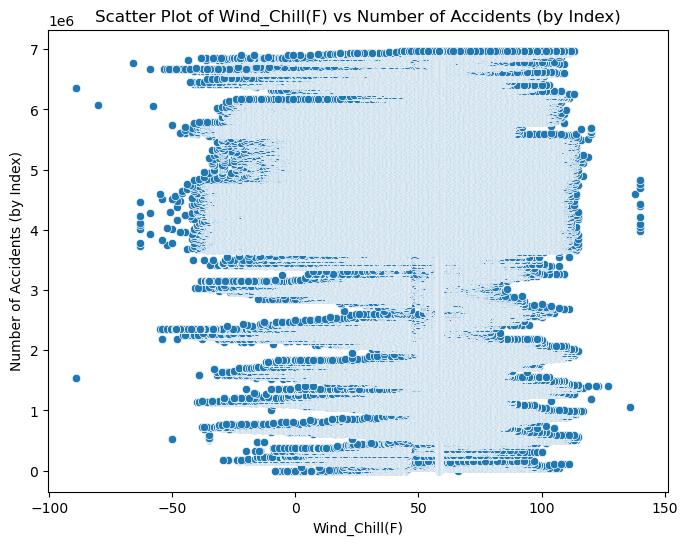

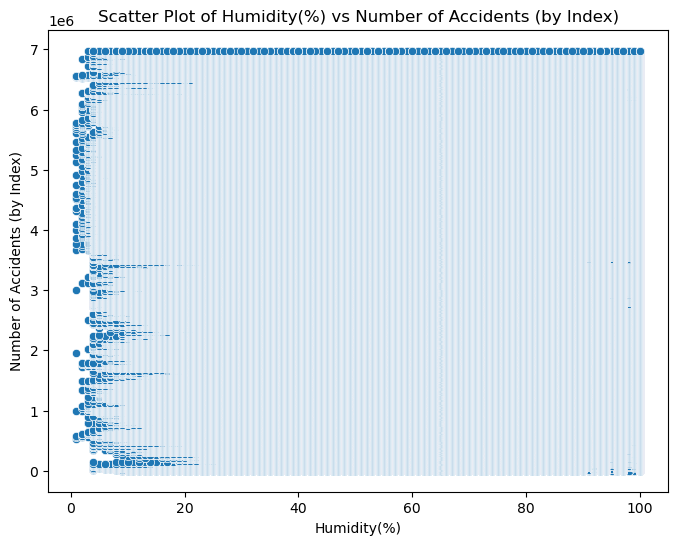

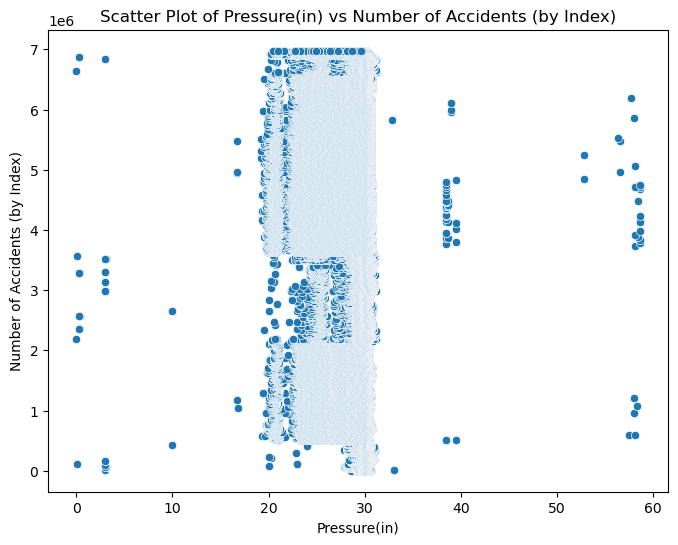

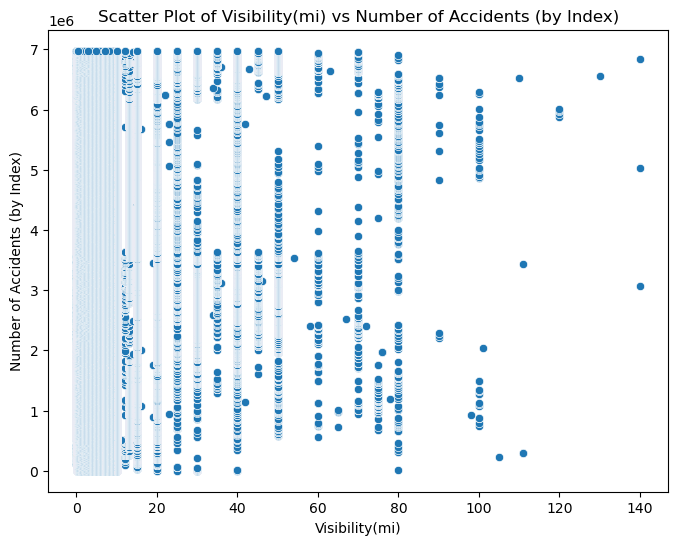

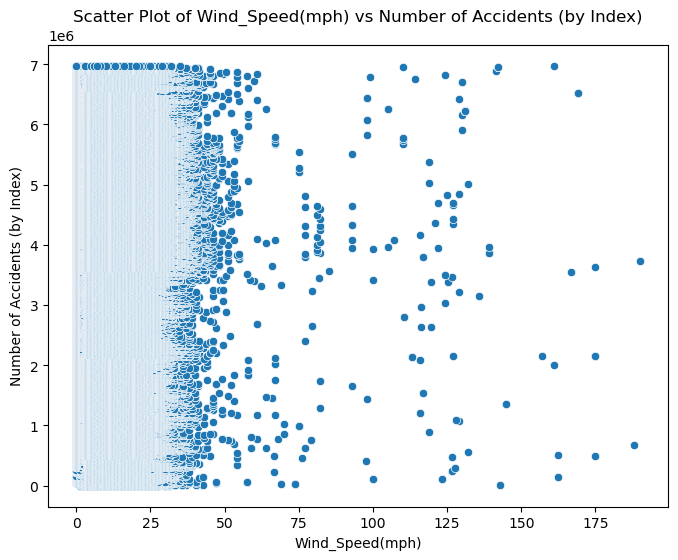

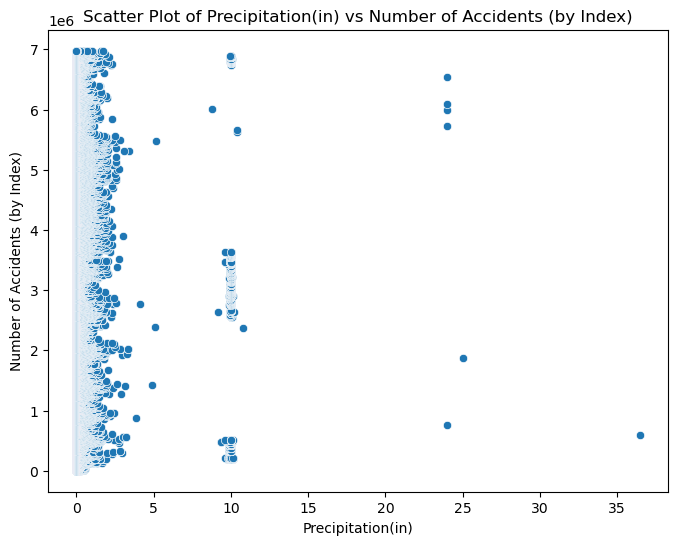

In [72]:
# Create scatter plots for each continuous variable against the index (representing the number of accidents)
for col in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y=df.index, data=df)  # Index represents the number of accidents
    plt.title(f'Scatter Plot of {col} vs Number of Accidents (by Index)')
    plt.xlabel(col)
    plt.ylabel('Number of Accidents (by Index)')
    plt.show()

### Hypothesis

Wind speed is not a significant factor in the occurrence of car crashes.

### Prepare for regression analysis using Severity and Precipitation

In [86]:
# Create a new column 'Accident_Number' using the DataFrame index
df['Accident_Number'] = df.index

In [87]:
# Check the first few rows to ensure it was added correctly
print(df[['Accident_Number']].head())

   Accident_Number
0                0
1                1
2                2
3                3
4                4


In [104]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Wind_Speed(mph)'].values.reshape(-1,1)
y = df['Accident_Number'].values.reshape(-1,1)

In [105]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [106]:
# Create a regression object.

regression = LinearRegression()

In [107]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

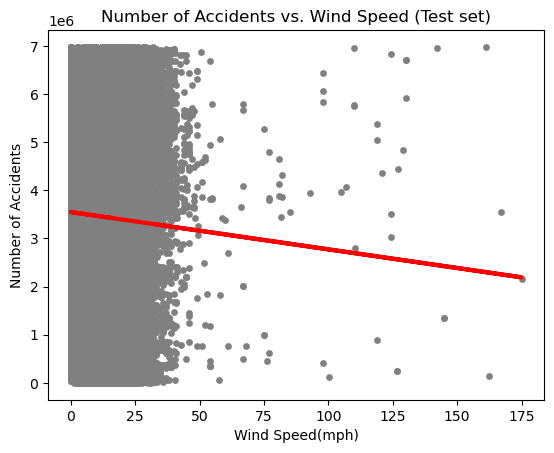

In [109]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Accidents vs. Wind Speed (Test set)')
plot_test.xlabel('Wind Speed(mph)')
plot_test.ylabel('Number of Accidents')
plot_test.show()

According to the slope it looks like increasing wind speed would not cause a higher number of accidents, the number of accidents actually go down as wind speed increases. This is most likely due to the significant drop in points of values.

In [110]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [111]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7746.3421885]]
Mean squared error:  4056072713660.244
R2 score:  0.00037761227757393545


The r2 score suggests no relationship between number of accidents and wind speed. 

In [112]:
y_predicted

array([[3423780.45539719],
       [3512088.75634613],
       [3405189.23414478],
       ...,
       [3547721.93041325],
       [3470258.50852821],
       [3298289.71194342]])

In [113]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0   1208821  3.423780e+06
1   2402185  3.512089e+06
2   6791122  3.405189e+06
3   6505366  3.493498e+06
4   4657118  3.508990e+06
5    581648  3.547722e+06
6   6948101  3.524483e+06
7   3101284  3.494272e+06
8   1409024  3.547722e+06
9   3797065  3.508990e+06
10   191276  3.494272e+06
11  2167384  3.423780e+06
12  5524163  3.493498e+06
13  4367198  3.501244e+06
14  4995373  3.392795e+06
15  2961727  3.512089e+06
16  5293608  3.423780e+06
17  6361369  3.547722e+06
18  1795462  3.478005e+06
19   150682  3.520610e+06
20  3412121  3.484977e+06
21  4326702  3.470259e+06
22  6837979  3.493498e+06
23   205005  3.484977e+06
24   970388  3.323078e+06
25  1773997  3.423780e+06
26  4291334  3.547722e+06
27  4117182  3.439273e+06
28  2919197  3.520610e+06
29  5623390  3.508990e+06

The predicted y values and the actual y values show a significant difference. This model is not a good fit for this analysis. 

### Compare how regression fits the training set

In [114]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [115]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [116]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7746.3421885]]
Mean squared error:  4054067019361.48
R2 score:  0.00037658322678535416


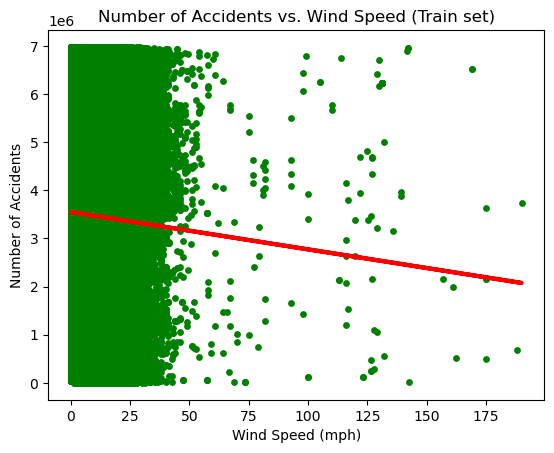

In [117]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Accidents vs. Wind Speed (Train set)')
plot_test.xlabel('Wind Speed (mph)')
plot_test.ylabel('Number of Accidents')
plot_test.show()

### Conclusion

Wind speed has a very insignificant relationship with the number of accidents. From analysis I gather that weather has little to no influence on number of car crashes, which leads me to believe there are other factors that contribute more heavily to car accidents. The model performed very poorly on the test set, but that is because there is no relationship. If I had continuous variables in my dataset that showed a relationship with one another, then this analysis would be better suited to my data. The regression analysis was helpful for me to realize that I need to look at other variables besides weather conditions. However, the variables I need to look at are categorical and not applicable to this type of analysis.

#### Exporting data set 

In [15]:
#Exporting Dataset
df.to_csv(os.path.join(path, 'Data','cardata_updated.csv'))